# DS 5030 Project 1

### Names: Erin Siedlecki, Shaveen Saadee, Anna Li, Emily Garman, Razan Habboub, Marissa Burton


## Question 1

In [2]:
import pickle, music21, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
# load and inspect data
df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv", low_memory=False)
swift = df.query("spotify_artist_id == '06HL4z0CvFAxyc27GXpf02'")

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
swift.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
10794,10795,<verse_1> C Amin F C Amin F C Amin F G C G Ami...,NaN,'pop',NaN,NaN,artist_6080,pop,NaN,06HL4z0CvFAxyc27GXpf02
11295,11296,<intro_1> G Cadd9 G Cadd9 <verse_1> G Cadd9 G ...,2019-12-06,'pop',2010.0,NaN,artist_6080,pop,2mvabkN1i2gLnGAPUVdwek,06HL4z0CvFAxyc27GXpf02
15894,15895,<verse_1> Amin F G Dmin Amin F G Dmin Amin C G...,NaN,'pop',NaN,NaN,artist_6080,pop,NaN,06HL4z0CvFAxyc27GXpf02
16233,16234,<intro_1> Cmaj7 Dsus2 Amin Cmaj7 Dsus2 Amin <v...,2022-10-21,'pop',2020.0,NaN,artist_6080,pop,5jQI2r1RdgtuT8S3iG8zFC,06HL4z0CvFAxyc27GXpf02
18801,18802,<intro_1> Dmin E7 Amin <verse_1> E/Gs C/G Fsdi...,2022-01-21,'pop',2020.0,NaN,artist_6080,pop,3tGq7hWDCtrnL83y5OGual,06HL4z0CvFAxyc27GXpf02


In [6]:
# checking for missing values
swift.isna().sum() 

id                     0
chords                 0
release_date          79
genres                 0
decade                79
rock_genre           185
artist_id              0
main_genre             0
spotify_song_id       35
spotify_artist_id      0
dtype: int64

In [7]:
# load and inspect data
taylor = pd.read_csv('swift_mapped.csv')
taylor.head()

,id,time,chord,root,1,2,3,4,5,6,7,8,9,10,11,12
0,10795,1,C,C,1,0,0,0,1,0,0,1,0,0,0,0
1,10795,2,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
2,10795,3,F,F,1,0,0,0,0,1,0,0,0,1,0,0
3,10795,4,C,C,1,0,0,0,1,0,0,1,0,0,0,0
4,10795,5,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0


In [8]:
# shows the unique chords in the dataset
taylor['chord'].value_counts()

chord
G         3833
C         3677
D         2288
F         2228
Amin      2168
          ... 
Dno3d        2
Dbmin        1
C7sus4       1
Aadd13       1
Gsdim7       1
Name: count, Length: 65, dtype: int64

In [9]:
# checking for missing values
taylor.isna().sum() 

id       0
time     0
chord    0
root     0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
dtype: int64

In [10]:
# shows the number of unique songs and the number of chords present in that song
taylor['id'].value_counts().sort_values(ascending = False)

id
270242    1411
328244    1374
408512     274
407678     236
639719     234
          ... 
219682      29
577337      28
46348       23
385586      14
133299      12
Name: count, Length: 185, dtype: int64

The data we are using in this analysis is the Chordonomicon dataset which consists of data from 666,000 chord progressions. The dataset also contains additional information such as release date, decade, genre, and Spotify song and artist IDs. In our particular analysis, we are limiting our search to music by Taylor Swift, but the original dataset contains information from many artists. The purpose of this project is to create a chord generator using Taylor Swift's chord data and generate a sequence of chords that sound similar to a Taylor Swift song. For the purposes of our project, we are using the "taylor" dataframe that lists all of the individual chord progressions over time per song. The data is updated as of 12/3/24, so not all of Taylor Swift's music is in this dataset. While recent releases from her discography are technically missing in the Chordonomicon data, there is still plenty of data present for us to work with. However, more data is better when creating a chord generator in this scenario, so the lack of current Taylor Swift music data could impact our analysis. When determining the presence of missing data from the existing dataset, we found missing values in the "swift" dataset for the columns release_date, decade, rock_genre, and spotify_song_id. Because none of these columns are used in the "taylor" dataset which will be used to create the chord generator, we are not concerned with the presence of these missing values. We did not find any missing values for the "taylor" dataframe that contains the chord information to be used in our analysis. 

The Chordonomicon dataset was collected by Spyridon Kantarelis, Konstantinos Thomas, Vassilis Lyberatos, Edmund Dervakos, and Giorgos Stamou from the Artificial Intelligence and Learning Systems Laboratory at the National Technical University of Athens, Greece. These researchers used web scraping to retrieve chord information from the Ultimate Guitar platform. They performed data engineering with the help of music experts to appropriately refine the chords. They also used the Spotify Web API to pull additional data regarding release date, genre, song ID, and artist ID.

The researchers describe the importance of chord progressions as the "backbone of musical composition", and they saught to generate a large-scale dataset that can be used for advanced machine learning. They collected this data because they noted that chord progression, while vital to music composition, is a very underexplored area of research. There are limited datasets currently in existence as collectors are restricted by copyright laws, lack of audio availability, distribution, and bias. The datasets that do exist at this time are not large enough for the work that this team is interested in. Their solution, the Chordonomicon dataset, has more than twenty times the amount of chord progressions than the previous largest dataset. Now that the data has been collected by this team, the researchers performed experiments on chord prediction and decade and genre classification.



## Citation

@article{kantarelis2024chordonomicon, title={CHORDONOMICON: A Dataset of 666,000 Songs and their Chord Progressions}, author={Kantarelis, Spyridon and Thomas, Konstantinos and Lyberatos, Vassilis and Dervakos, Edmund and Stamou, Giorgos}, journal={arXiv preprint arXiv:2410.22046}, year={2024} }

# Question 2

### Phenomenon: Chord Progressions

A **chord** is a combination of three or more notes played simultaneously to produce harmony. When chords are arranged in a specific order and played one after another, they form a **chord progression**, which serves as the foundation of a musical composition. Chord progressions occur frequently in music and play a key role in shaping a piece’s mood and emotional expression. For example, “Blackbird” by The Beatles features the progression G, Am7, G/B, G, creating a gentle and melodic flow, while “Fly Me to the Moon” by Frank Sinatra uses a more complex sequence (Am7, Dm7, G7, Cmaj7, Fmaj7, Bm7b5, E7, Am) to produce a rich and sophisticated sound. Chord progressions are usually expressed through roman numerals, so for "Blackbird," this would be **I-ii⁷-I⁶-I.**

Chord progressions guide listeners through an artist’s musical journey within a piece, intending to evoke specific emotions within their target audience. Such chord progressions vary depending on the genre and composition of a piece. For example, rock and jazz include more complex or unexpected progressions for more contrast and depth. On the other hand, pop artists rely on chords which can provide a bright and upbeat feeling among listeners, which might mean utilizing simpler progressions. 

By analyzing these patterns, researchers can better understand the unique musical styles of different artists and genres, understanding how chord combinations shape an artist's distinctive sound.

### Taylor Swift Chord Progression Analysis

For this project, we are focusing on Taylor Swift's use of chord progressions within the Chordonomicon dataset.

Taylor Swift typically relies on simple chord progressions that serve as effective hooks for each of her songs. She notably utilizes the same three chord progressions that have made up the majority of her discography over the years, including: I-V-vi-IV, I-vi-IV-V, and I-V-ii-IV. 

Her most popular songs include:
- **"Blank Space" -->** featuring I-vi-IV-V (F – Dm – B♭ – C), I-V-vi-IV (F – C – Dm – B♭)
- **"You Belong With Me" -->** featuring I-V-ii-IV (C – G – Dm – F)
- **"All too Well" -->** featuring I-V-vi-IV (C – G – Am – F)

By using the same chord progressions across her albums, Swift has made herself a household name through maintaining a cohesive identity through each of her "eras," thus writing catchy/emotional pop songs that resonate with many people. As a result, her music has become recognizable to the masses, focusing more on lyrical content rather than complex chord progressions.

By modeling her chord progressions, we can analyze patterns such as:
- The probability of one chord following another.
- The distribution of chord types (major, minor etc.) and chord progressiosn that dominate her music.
- The usual length and structure of chord sequences within a song.

In [11]:
# -- Taylor Swift's most used chords --
taylor['chord'].value_counts()

chord
G         3833
C         3677
D         2288
F         2228
Amin      2168
          ... 
Dno3d        2
Dbmin        1
C7sus4       1
Aadd13       1
Gsdim7       1
Name: count, Length: 65, dtype: int64

#### Citations:
- https://www.fender.com/articles/chords/what-is-a-chord#:~:text=Sections,consist%20of%203%20different%20notes.
- https://www.musical-u.com/learn/what-is-a-chord-progression/
- https://www.youtube.com/watch?v=6qqxunr6o9o&t=38s
-https://www.justinguitar.com/songs/taylor-swift-blank-space-chords-tabs-guitar-lesson-sg-143#:~:text=You%20can%20also%20try%20these%20chord%20progressions,G%2C%20Em%2C%20Am%2C%20C%20for%20the%20chorus
- https://www.youtube.com/watch?v=88-DyhtuKiM&t=218

## Question 3

The variable we are focusing on for this project is "chord", since we want to use prior data on Taylor Swift chord progressions in order to create a new chord progression. Since "chord" is not a numeric variable, we cannot conduct numeric non-parametric tests such as a KDE or an ECDF. Additionally, it would not make sense to use a local constant least squares regression model, since our data is discrete, not continuous. Instead, we will opt for a Markov transition model.

The purpose of a Markov chain is to examine a current observation in a sequence and predict the next observation based on prior data; more specifically, the model will assess the empirical probabilities of one observation coming after another and choose the most likely outcome. For this data specifically, our goal is to create a state space of chord observations from prior Taylor Swift chord progression data (chosen through this Markov process) that will attempt to mimic a typical Taylor Swift chord progression.

Since many Taylor Swift songs follow simple, similar chord progressions, we should not have too many issues implementing this Markov chain. However, songs in different keys might clash with each other. We create below a transition matrix in order to properly evaluate probabilities of moving from one state to the next.

# Question 4

In [9]:
import pandas as pd
import numpy as np
import pickle, music21, re
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
# import data
swift = pd.read_csv('./swift_mapped.csv')
swift.head(20)

,id,time,chord,root,1,2,3,4,5,6,7,8,9,10,11,12
0,10795,1,C,C,1,0,0,0,1,0,0,1,0,0,0,0
1,10795,2,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
2,10795,3,F,F,1,0,0,0,0,1,0,0,0,1,0,0
3,10795,4,C,C,1,0,0,0,1,0,0,1,0,0,0,0
4,10795,5,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
5,10795,6,F,F,1,0,0,0,0,1,0,0,0,1,0,0
6,10795,7,C,C,1,0,0,0,1,0,0,1,0,0,0,0
7,10795,8,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
8,10795,9,F,F,1,0,0,0,0,1,0,0,0,1,0,0
9,10795,10,G,G,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
# making chords conducive with music21
seq = []
songs = swift['id'].unique()
for song in songs:
    df_s = swift.loc[ swift['id']==song, :]
    lt = list(df_s['chord'])
    lt = [ re.sub(r' ','', ch) for ch in lt]
    lt = [ re.sub(r'M','', ch) for ch in lt]
    lt = [ re.sub(r'(?<=[A-G])s(?!us)', '#', ch) for ch in lt]
    lt = [ re.sub(r'b','-', ch) for ch in lt]
    lt = [ re.sub(r'min','m', ch) for ch in lt]
    lt = [ re.sub(r'dim7','dim', ch) for ch in lt]
    lt = [ re.sub(r'no3d','', ch) for ch in lt]
    seq.append( lt )

swift = seq

In [12]:
# ----- determine the state space -----

states = set()
for song in swift:
    states = states.union( set(song) )
states = list(states)

print('States:\n', np.array(states) )

States:
 ['C#' 'C' 'D#' 'Dm' 'Asus2' 'E' 'Gm' 'Bm7' 'A' 'Dsus4' 'Am' 'Gadd11'
 'Asus4' 'Dm7' 'Emadd13' 'Fm' 'B-' 'Cmaj7' 'E7' 'D7' 'F#' 'G7' 'Aadd13'
 'Csus2' 'Bm' 'B7' 'Fmaj7' 'Dmaj7' 'Cm7' 'Am7' 'C9' 'B' 'F#7' 'A7sus4'
 'F#7sus4' 'G#dim' 'E-' 'A7' 'B-sus4' 'A-' 'Cadd9' 'D' 'E7sus4' 'Bsus4'
 'E-7' 'F' 'C7' 'D#m' 'Em7' 'Gadd13' 'Gsus4' 'F#m' 'G' 'Em' 'C#m' 'F#dim'
 'D-m' 'Fsus2' 'Dsus2' 'Cm' 'C7sus4' 'Gmaj7' 'G#m' 'G#']


In [13]:
# play state space - chords valid for music21
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  

In [14]:
# ----- transition matrix -----

S = len(states)
T = len(swift)
tr_counts = np.zeros( (S, S) )

# compute transition counts:
for song in swift:
    seq = np.array(song)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

#print('Transition Counts:\n', tr_counts)

# sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
#print('State proportions: \n',sums)

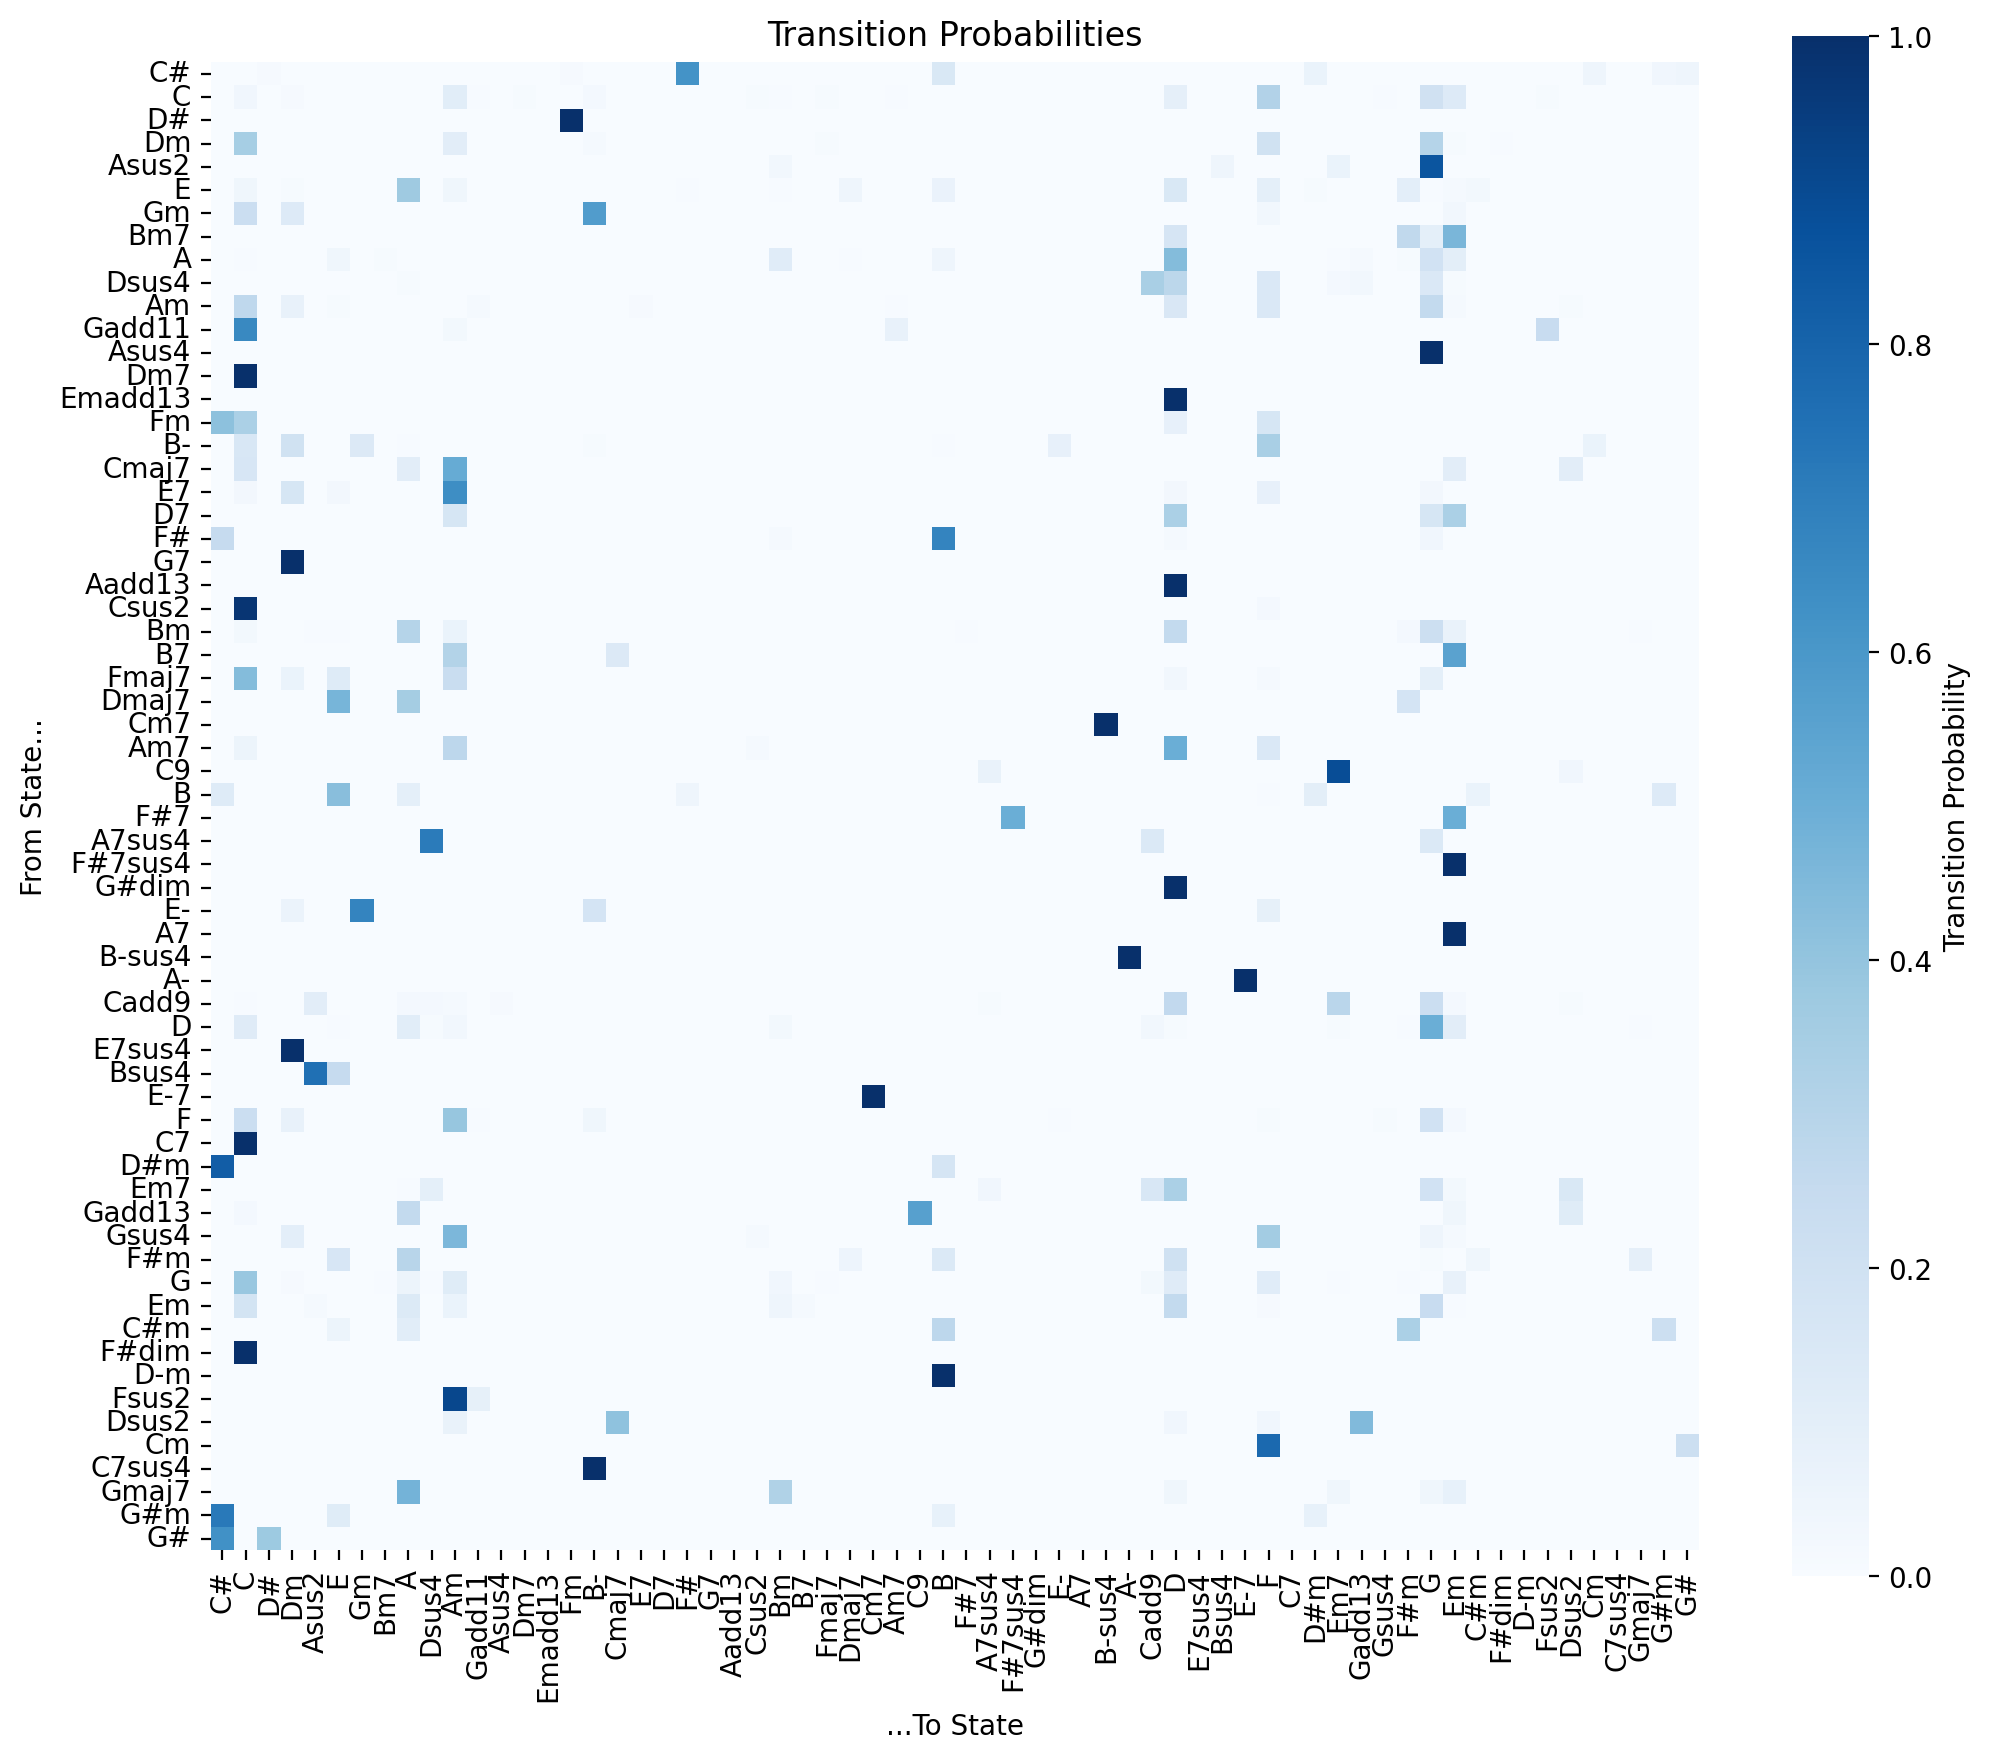

In [ ]:
# ----- probability of chord transitions using first order Markov chain -----

# normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

#print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
#print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Probability of Chord Transitions Using First Order Markov Chain Model')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [16]:
# ----- order 2 Markov transitions -----

order = 2
songs = []
for song in swift:
    T = len(song)
    entry = [' '.join(song[(t-order-1):(t-1)]) for t in range(order+1, T)]
    songs.append(entry) 

states = set()
for song in songs:
    states = states.union( set(song) )
states = list(states)

print('States:\n', np.array(states) )

S = len(states)
tr_counts = np.zeros( (S, S) )

# Fix the transition counting (around line where you have the nested loops):
for song in songs:
    seq = np.array(song)
    for t in range(1,len(seq)):
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_to, index_from] += 1  # TO, FROM not FROM, TO

sums = tr_counts.sum(axis=1, keepdims=True)
state_props = sums/np.sum(sums)

# And fix the transition probability normalization:
tr_pr = np.divide(tr_counts, sums, 
                 out=np.zeros_like(tr_counts), 
                 where=sums!=0)
print('\nTransition Proportions:\n', tr_pr)

States:
 ['E7 G' 'D7 C' 'F Am' 'Gadd11 F' 'Em F#7sus4' 'Cadd9 Dsus4' 'F# D' 'A Am'
 'Em A' 'Cmaj7 Dsus2' 'Am7 Am' 'E F#m' 'E F' 'D F#' 'Am E' 'D D' 'G# Cm'
 'F Am7' 'A7sus4 Cadd9' 'A B' 'F B' 'E Dm' 'C9 Gadd13' 'Em Gm' 'B7 Em'
 'C C7' 'B D#m' 'C Dm' 'Am Gadd11' 'G Em7' 'F Fm' 'B E' 'F#7sus4 F#7'
 'B D-m' 'Fsus2 Gadd11' 'Am E7' 'Cm C#' 'C# G#' 'Em7 Am' 'B C#' 'E C#m'
 'Em Gsus4' 'F#m C#m' 'C# Fm' 'Em F' 'Gmaj7 F#m' 'D Cadd9' 'A7sus4 C9'
 'Am Dsus2' 'B- E-' 'Fmaj7 G' 'Fmaj7 C' 'A C' 'Dm F' 'Dsus4 F' 'A Gmaj7'
 'Gm B-' 'G F' 'A Cmaj7' 'F Cm' 'F#m E' 'Gm E-' 'E B' 'A Bm' 'F Gm' 'C Gm'
 'Dm Fmaj7' 'D Am' 'G Fmaj7' 'Fsus2 C' 'Am Cmaj7' 'Em7 A' 'D#m B'
 'Em Dsus4' 'Em7 Asus2' 'E7 F' 'C D' 'B B-' 'Bm Am' 'F# B' 'G#m C#m'
 'G Bm7' 'E7 D' 'Gadd11 C' 'Cmaj7 G' 'Dsus4 Cadd9' 'C Gadd11' 'Gsus4 F'
 'E Bm' 'A B-' 'E7 Am' 'B7 D' 'Bm Asus2' 'A D' 'Bm7 G' 'D7 G' 'A7sus4 Em7'
 'G D' 'D A' 'Em Dm' 'B F#m' 'Em D7' 'C Cadd9' 'F E7' 'Fm Em' 'B- C'
 'Am G' 'G A' 'F Dm' 'Csus2 Gsus4' 'G E7' 'Cadd9 G' 'Em Em7' 

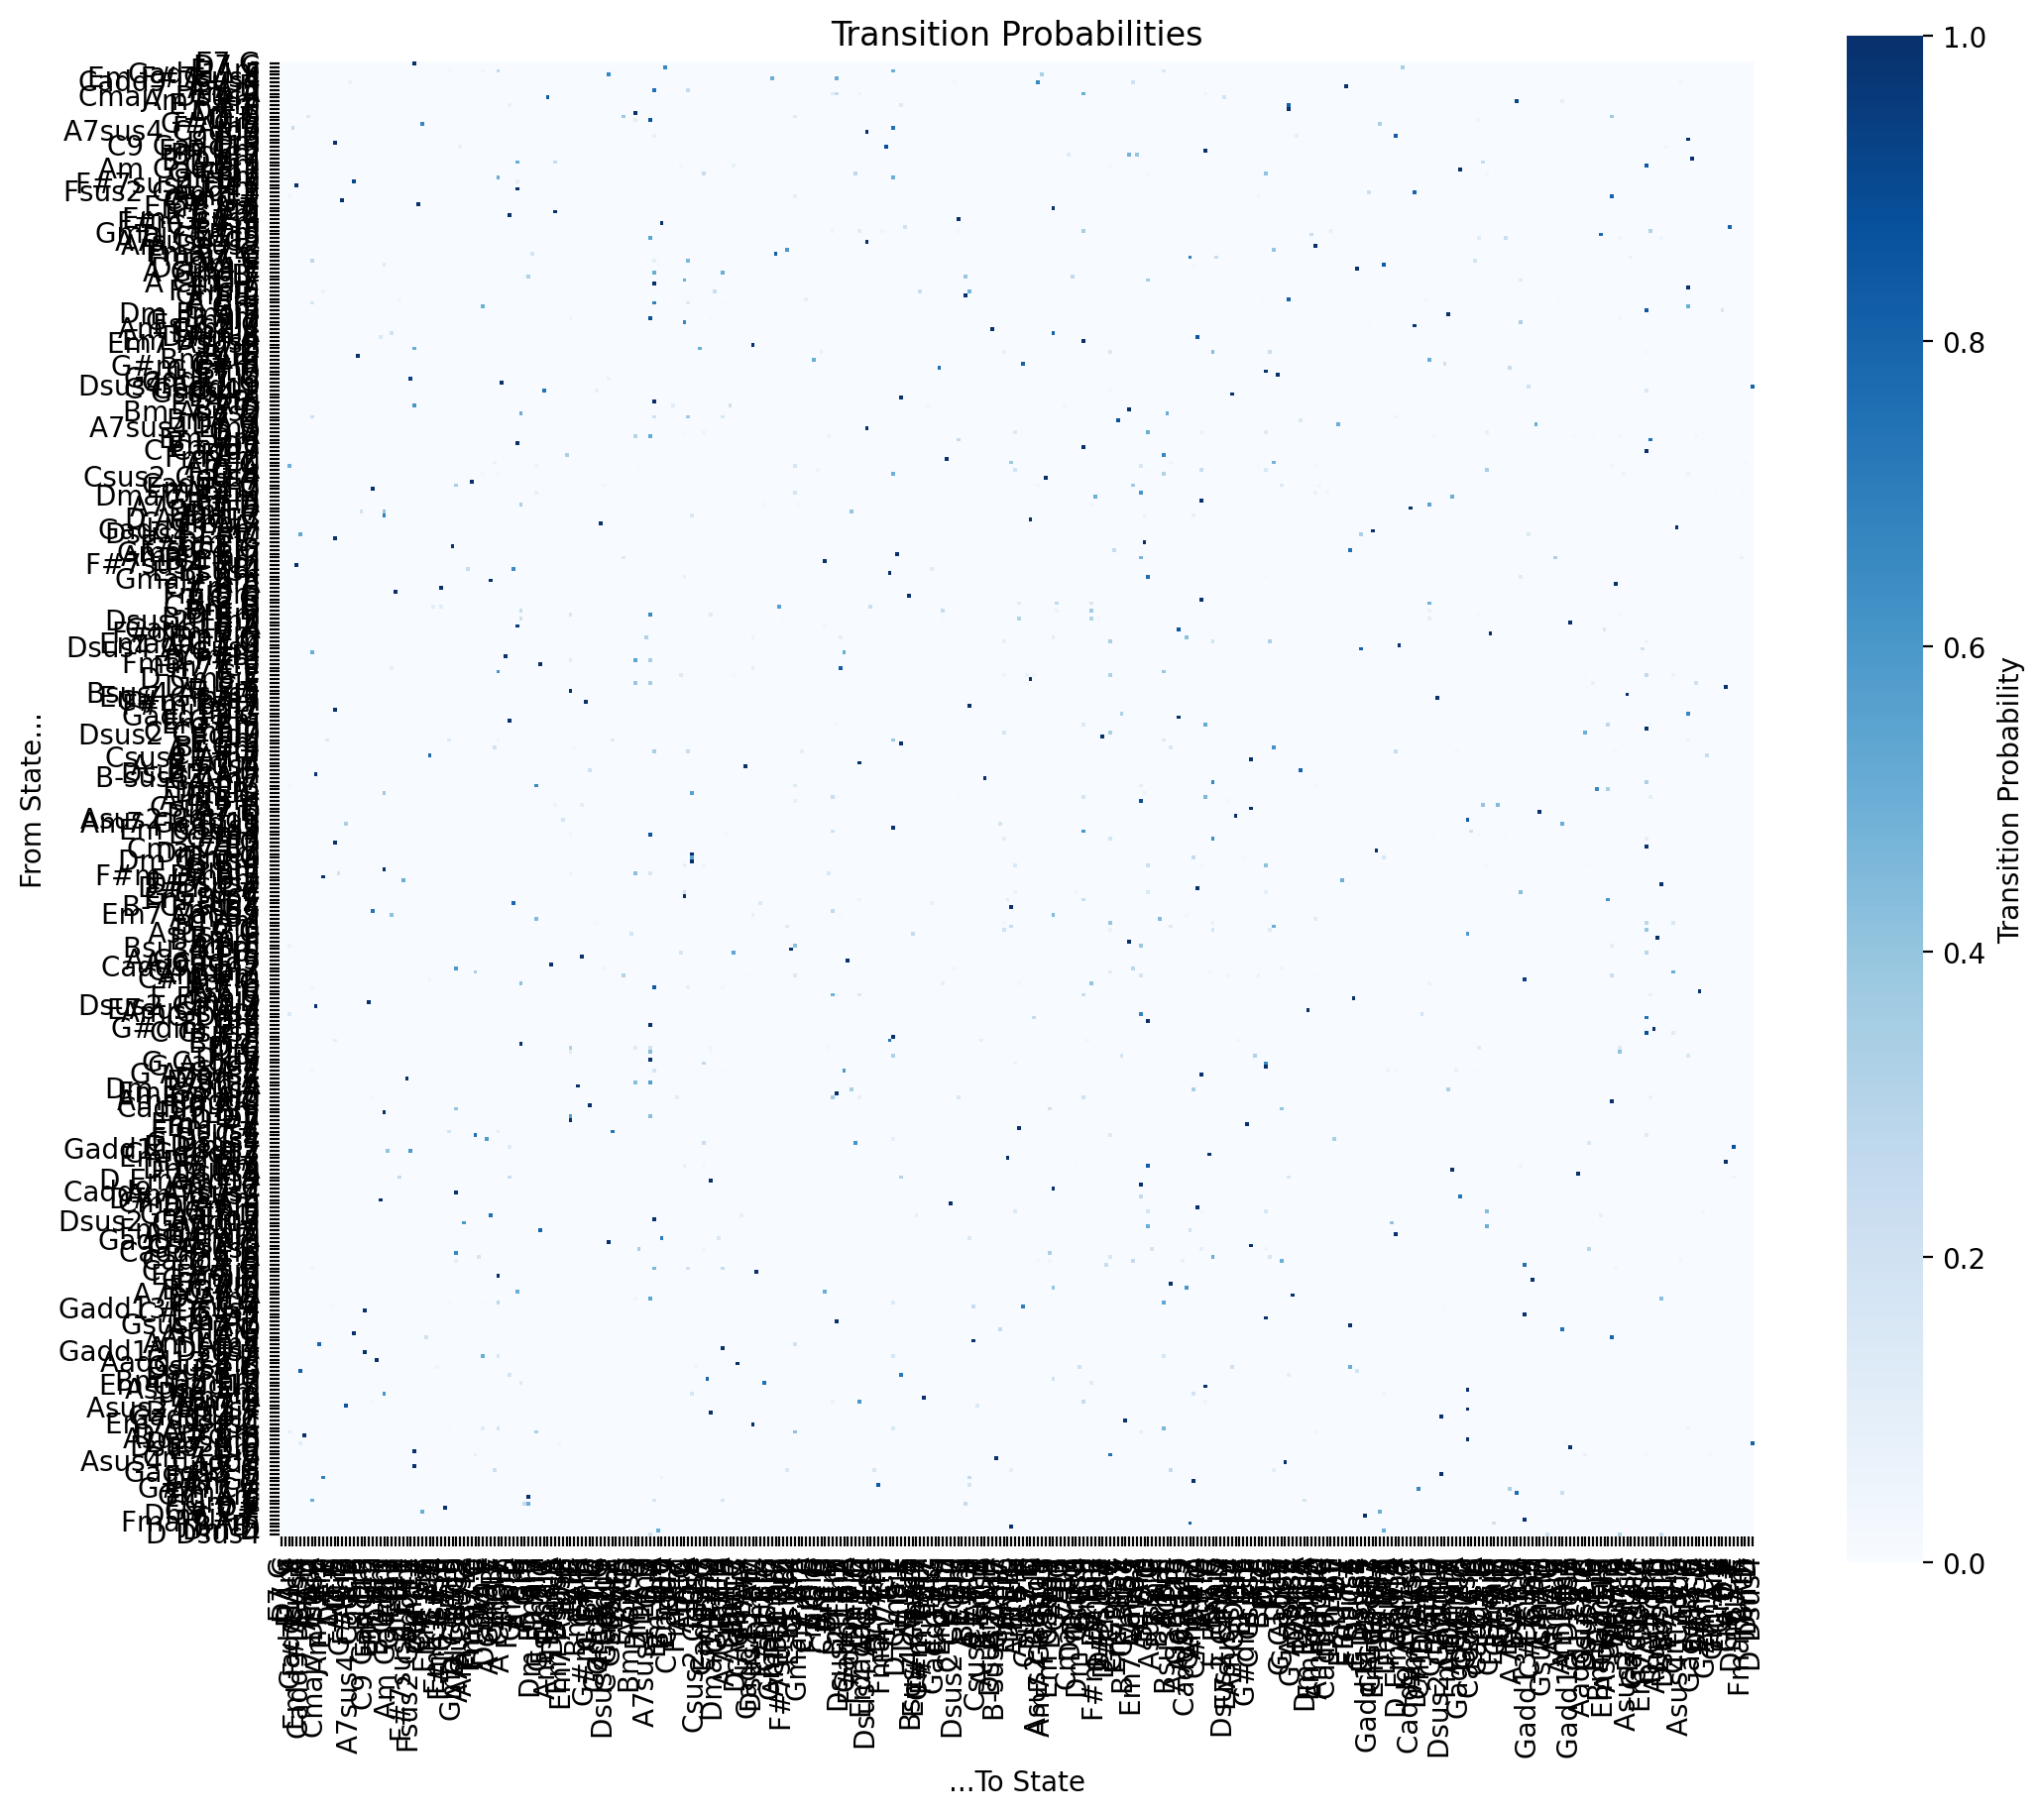

In [ ]:
# ----- transition probabilities using order 2 markov chain model -----
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Probability of Chord Transitions Using Order 2 Markov Chain Model')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)
plt.tight_layout()
plt.show()

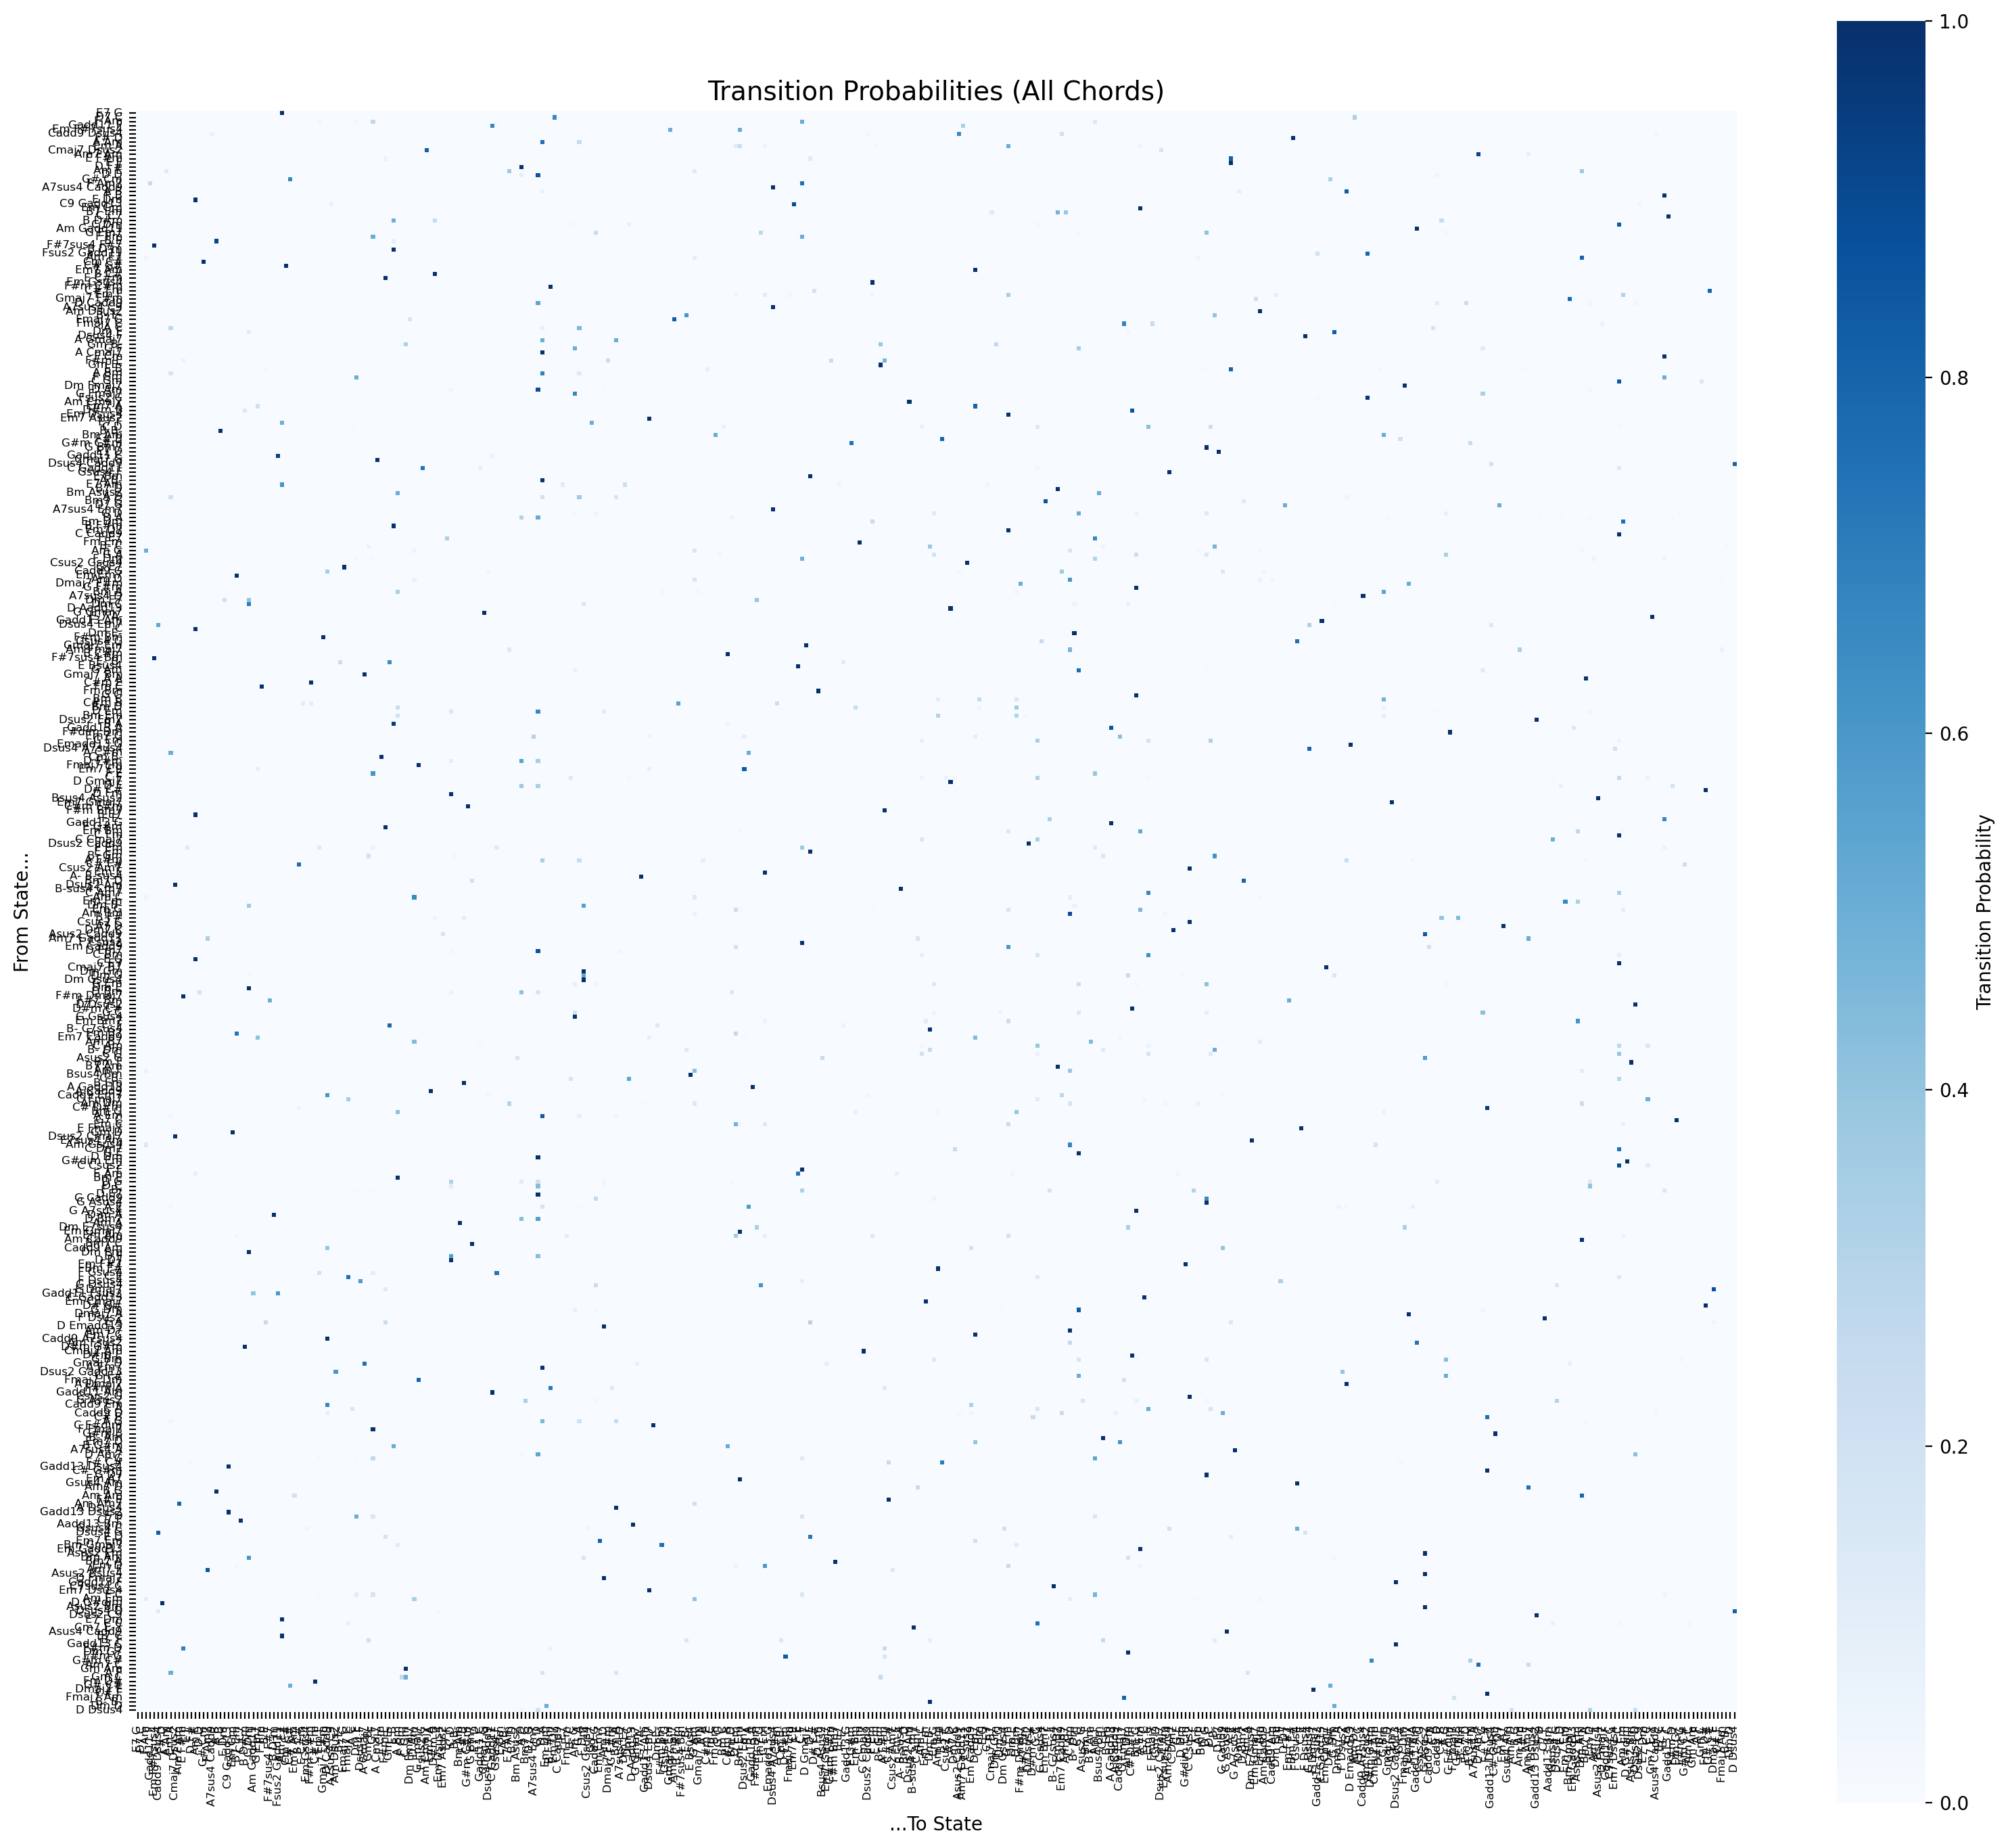

In [21]:
plt.figure(figsize=(16,14))
sns.heatmap(tr_pr, cmap='Blues', square=True,
            xticklabels=states, yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)
plt.title('Transition Probabilities (All Chords)', fontsize=14)
plt.xlabel('...To State', fontsize=10)
plt.ylabel('From State...', fontsize=10)
plt.tight_layout()
plt.show()


In [18]:
# ----- connections -----

G = nx.from_numpy_array(tr_pr, create_using=nx.DiGraph())

# Check if strongly connected (every chord can reach every other chord)
is_strongly_connected = nx.is_strongly_connected(G)
print(f"Strongly connected: {is_strongly_connected}")

# Check if weakly connected (ignoring edge direction)
is_weakly_connected = nx.is_weakly_connected(G)
print(f"Weakly connected: {is_weakly_connected}")

# Get connected components if not connected
if not is_strongly_connected:
    strong_components = list(nx.strongly_connected_components(G))
    print(f"Number of strongly connected components: {len(strong_components)}")


Strongly connected: False
Weakly connected: False
Number of strongly connected components: 4


In [32]:
# ----- generate new swift music -----

np.random.seed(10000) # Favorite
#np.random.seed(5000) 
initial_state = np.random.choice(states) # Choose an initial state at random

initial_state = 'C G'
# initial_state = 'Am Dm'

state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 

tr_pr = tr_pr.astype(float)  # ensure float division
row_sums = tr_pr.sum(axis=1, keepdims=True)
tr_pr = tr_pr / row_sums

n_sim = 20
simulation = [initial_state]

for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = np.nan_to_num(pr_t, nan=0.0)
    pr_t = pr_t / pr_t.sum()
    
    # print(state_index)
    # print(pr_t)
    # print("Sum of probs:", pr_t.sum())

    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation

print(simulation)

Initial state: C G
['C G', 'G Am', 'Am E7', 'E7 Dm', 'Dm Am', 'Am E7', 'E7 C', 'C Dm', 'Dm C', 'C D', 'D F#m', 'F#m G', 'G Bm', 'Bm A', 'A Dsus4', 'Dsus4 D', 'D Dsus2', 'Dsus2 Cadd9', 'Cadd9 Em7', 'Em7 D']


In [ ]:
new_chorale = [state.split()[-1] for state in simulation] # convert to chords

# new swift chorale - initial state: C G
stream = music21.stream.Stream()
for chord_symbol in new_chorale:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')

## Question 5

The second-order Markov model was trained on chord sequences from the Chordomonian dataset to capture short-term harmonic dependencies. While the model successfully reproduced the same set of chords as the training data and encoded plausible local transitions (e.g., common progressions such as I → V → vi → IV), the simulated sequences differed perceptibly from the real songs. The generated MIDI sounded less coherent and lacked the larger-scale structure, repetition, and tonal stability present in the original compositions.
This divergence arises from several factors. First, even a second-order Markov process only considers the two previous chords, so it cannot represent longer musical phrases or cadential patterns that span full sections of a song. Second, some transitions in the training data were observed infrequently, producing unreliable estimates for those probabilities and occasionally leading to unnatural chord jumps. Finally, the training corpus was limited in size, so the transition matrix contained many near-zero entries, amplifying the effect of random variation when simulating new sequences.
Overall, the model’s estimates are credible for frequent transitions and successfully capture local harmonic tendencies, but unreliable for rare chords and insufficient to reproduce higher-order structure. The results exhibit noticeable uncertainty, reflecting both data sparsity and the simplifying Markov assumption. A more realistic generation could be achieved by increasing the dataset size, smoothing the transition probabilities, or employing higher-order or neural sequence models that account for longer musical context.


heatmap interpretation

The first heatmap (training data) shows distinct, high-probability transitions between specific chords, reflecting the structured harmonic patterns present in the original songs. In contrast, the second heatmap (simulated sequence) appears far more diffuse and sparse, indicating that the generated music explores a wider range of transitions, many of which were rare or absent in the training data. This outcome confirms that the simulation correctly reflects the stochastic nature of the Markov model — it captures some local tendencies but fails to replicate the strong structure and consistency of the original compositions.

**Suggestion** 

Filter on Top 25 Chord Transition Probabilities

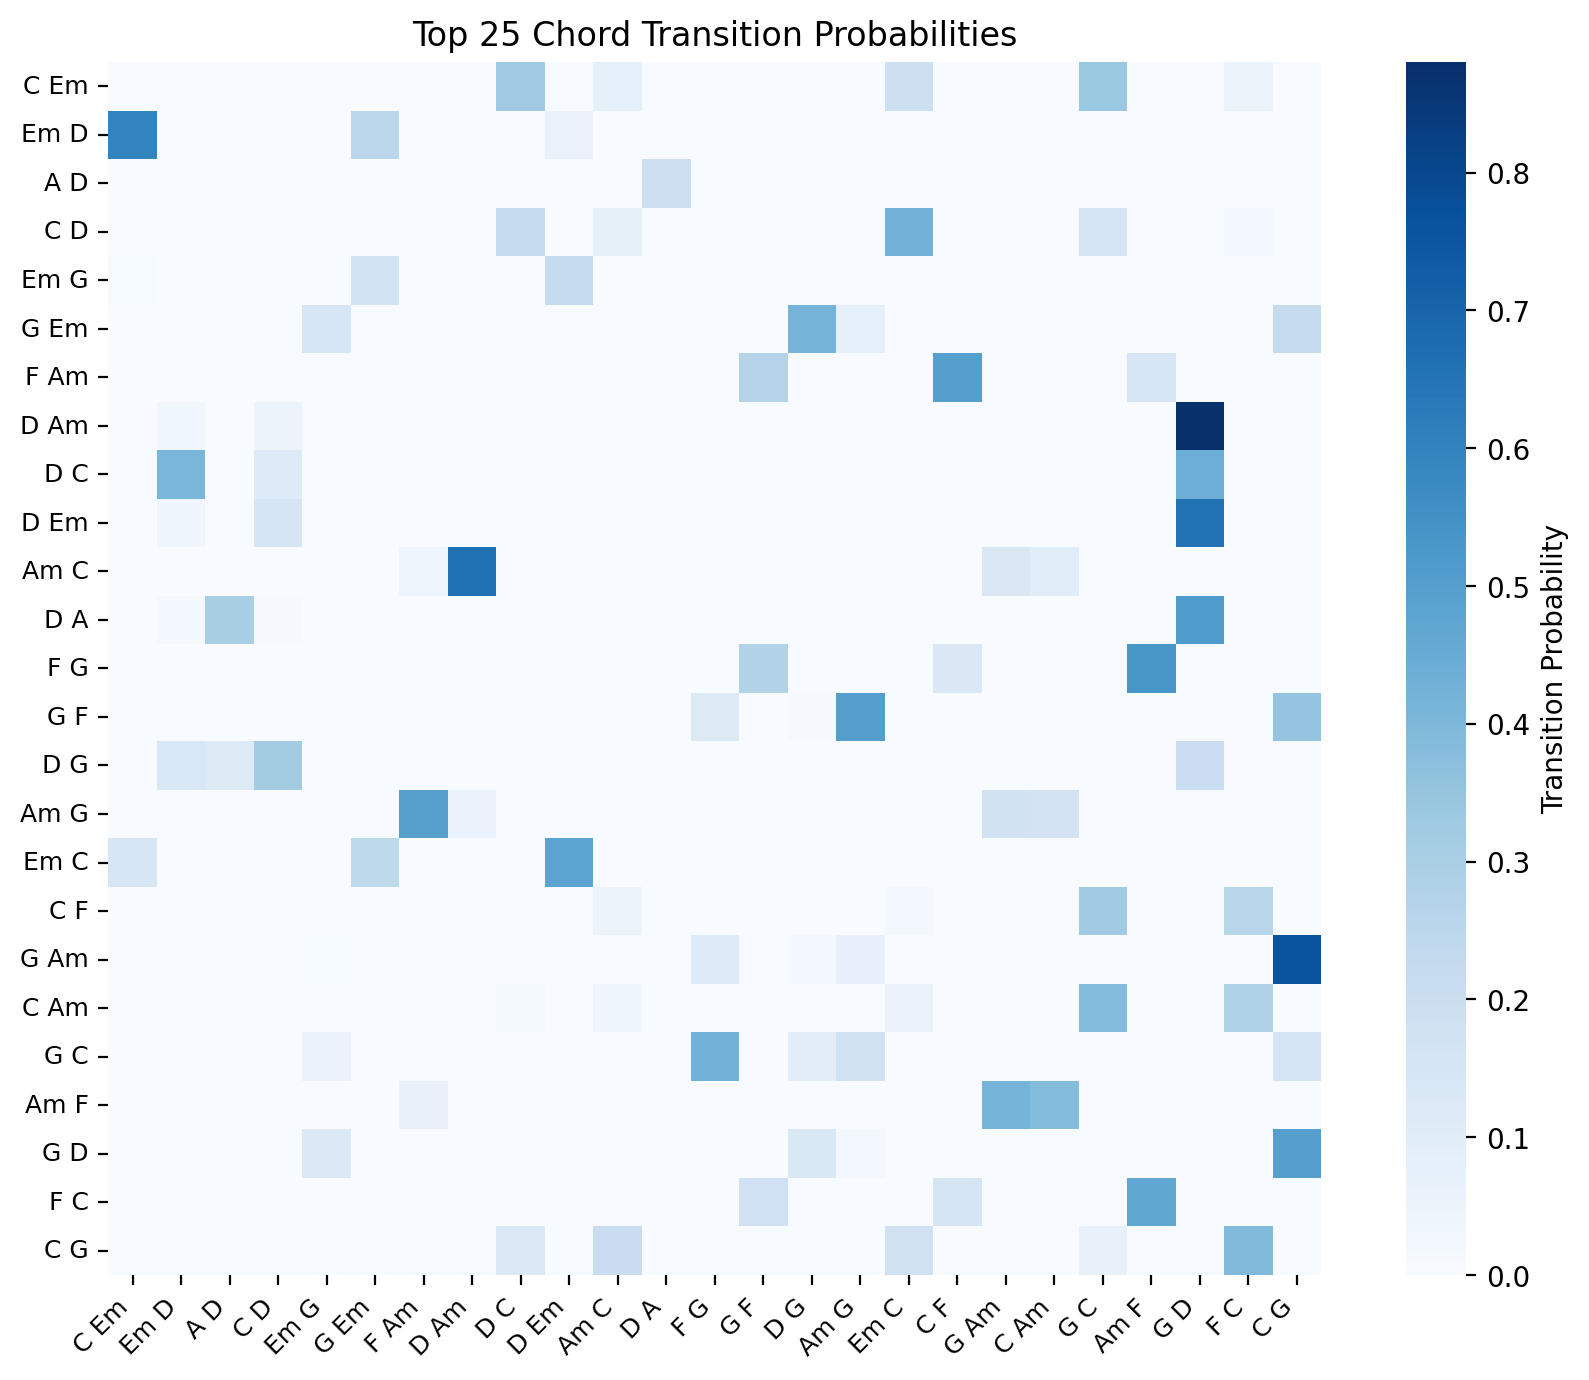

In [27]:
# pick top-K by how often the FROM-state occurs
row_mass = tr_counts.sum(axis=1)            # or tr_pr.sum(axis=1)
K = 25
top_idx = np.argsort(row_mass)[-K:]
top_states = [states[i] for i in top_idx]

tr_pr_top = tr_pr[np.ix_(top_idx, top_idx)]

plt.figure(figsize=(9,7))
sns.heatmap(tr_pr_top, cmap='Blues', square=True,
            xticklabels=top_states, yticklabels=top_states,
            cbar_kws={'label':'Transition Probability'})
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title('Top 25 Chord Transition Probabilities')
plt.tight_layout()
plt.show()


In [30]:
import numpy as np
import music21

def simulate_markov_order2(tr_pr, states, n_steps=32, start_idx=None, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    K = len(states)

    # Tokenize bigram states like "G Em" → ["G","Em"]
    toks = [s.split() for s in states]

    # Column sums to choose a strong starting FROM-state
    col_sums = tr_pr.sum(axis=0)

    if start_idx is None:
        start_idx = int(np.argmax(col_sums)) if col_sums.sum() > 0 else int(rng.integers(K))

    sim_idx = [start_idx]
    for _ in range(n_steps - 1):
        col = tr_pr[:, sim_idx[-1]]            # P(next_state | current_state) with TO,FROM convention
        if col.sum() == 0:
            probs = col_sums / (col_sums.sum() if col_sums.sum() > 0 else K)
        else:
            probs = col / col.sum()
        next_idx = int(rng.choice(K, p=probs))
        sim_idx.append(next_idx)

    # Reconstruct chord *sequence* from bigram states:
    # start with both chords from the first state, then append the last token of each next state
    seq = []
    first_bigram = toks[sim_idx[0]]
    if len(first_bigram) == 2:
        seq.extend(first_bigram)                   # [c_{t-1}, c_t]
    else:
        seq.append(first_bigram[-1])               # fallback

    for k in sim_idx[1:]:
        seq.append(toks[k][-1])                    # append the "new" chord from the next bigram

    return seq  # list of chord symbols

# --- simulate & render
simulation_chords = simulate_markov_order2(tr_pr_top, top_states, n_steps=32)
new_chorale = simulation_chords

stream = music21.stream.Stream()
for chord_symbol in new_chorale:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)
    stream.append(chord)

stream.write('midi', fp='music.mid')
stream.show('midi')


When we restricted the transition matrix to only the most frequent chords (top K), several good things happened at once:

- We removed noise.
Rare chords (appearing once or twice) have unreliable transition probabilities — basically random.
By dropping them, the simulation now moves between chords with well-estimated probabilities.
- We concentrated on a tonal center.
The most common chords usually belong to the same key (like C, G, Am, F).
That automatically gives the generated progression a stronger sense of key and harmony, so it sounds more musical.

- The chain became denser and smoother.
With only frequent states, every chord has more outgoing transitions with non-zero probability.
That prevents the model from “getting stuck” or jumping to strange isolated chords.

- Less randomness, more structure.
We’re basically telling the model: “Stay in the harmonic grammar that actually occurs often.”
So instead of wandering into one-off modulations or weird borrowed chords, it now cycles through realistic progressions.

## Question 6

This analysis demonstrated how a Markov chain can model chord transitions and generate new harmonic sequences based on observed patterns in the Chordomonian dataset. While the approach effectively captured short-term dependencies between chords, it was limited by the simplicity of the Markov assumption and the sparsity of the training data. The model ignored rhythm, melody, and long-range harmonic structure, which led to generated sequences that often sounded musically inconsistent compared to the original compositions.
Future work could address these limitations by using larger and more diverse datasets, applying smoothing or regularization to handle rare transitions, and exploring higher-order or hybrid probabilistic models. More advanced approaches—such as hidden Markov models, recurrent neural networks, or transformer-based architectures—could capture longer temporal context and stylistic patterns, producing music that more closely resembles human composition both statistically and perceptually.
